In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
yp=pd.read_excel("C:/Users/drsek/OneDrive/문서/대학교/대외활동/청소년 데이터 분석 활용 공모전/예측 모델/예측 모델/yp2021_w01필터.xlsx")

In [ ]:
yp2=pd.read_excel("C:/Users/drsek/OneDrive/문서/대학교/대외활동/청소년 데이터 분석 활용 공모전/예측 모델/예측 모델/yp2021_w01 원본.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
yp = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/yp2021_w01필터.xlsx")

In [ ]:
yp2.columns

Index(['sampid', 'BIRTHy', 'BIRTHm', 'w01AGE', 'GENDER', 'W01', 'w01edu',
       'w01eduy', 'w01edum', 'ED_region1',
       ...
       'w01E33', 'w01E33_1a', 'w01E33_1b', 'w01E33_1c', 'w01E33_2', 'w01E33_3',
       'w01E33_4a', 'w01E33_4b', 'w01E33_4c', 'w01E33_5'],
      dtype='object', length=1271)

In [ ]:
display(yp.head())

,w01AGE,GENDER,ED_region1,w01A16_1,w01A16_6,w01A17_4,w01Bb08,w01Bb09,w01Bb13,w01Bb14a,...,w01D10_7,w01D10_8,w01D10_9,w01D10_10,w01D11_1,w01D11_2,w01D11_3,w01D11_4,w01D11_5,w01E18
0,21,2,11,4.0,5.0,2.0,3.0,NaN,NaN,NaN,...,4,3,3,4,1,1,1,2,1,1.0
1,19,2,11,4.0,5.0,1.0,3.0,NaN,NaN,NaN,...,4,5,3,4,2,1,1,2,1,1.0
2,23,2,11,4.0,4.0,1.0,3.0,NaN,NaN,NaN,...,3,4,3,4,1,1,1,3,1,1.0
3,25,2,11,4.0,4.0,3.0,NaN,NaN,NaN,NaN,...,4,3,2,3,3,1,1,3,1,1.0
4,23,1,11,4.0,5.0,2.0,3.0,NaN,1.0,1.0,...,5,5,5,5,1,1,2,1,2,2.0


In [ ]:
yp = yp2[[
    'w01AGE','GENDER', 'ED_region1', 'w01A16_1', 'w01A16_6', 'w01A17_4',
    'w01Bb08', 'w01Bb09', 'w01Bb13', 'w01Bb14a', 'w01D01',
    'w01D02_L1', 'w01D04_L1', 'w01D05_L1', 'w01D07',
    'w01D09_1', 'w01D09_2', 'w01D09_3', 'w01D09_4', 'w01D09_5',
    'w01D09_6', 'w01D09_7', 'w01D09_8', 'w01D09_9', 'w01D09_10',
    'w01D09_11', 'w01D09_12', 'w01D10_6', 'w01D10_7', 'w01D10_8',
    'w01D10_9', 'w01D10_10', 'w01D11_1', 'w01D11_2', 'w01D11_3',
    'w01D11_4', 'w01D11_5', 'w01E18'
]]


청소년 연령대로 필터링

In [ ]:
yp = yp[(yp['w01AGE'] >= 19) & (yp['w01AGE'] <= 24)]

응답거절(9090908) 행 삭제

In [ ]:
yp = yp[yp['w01A16_1'] != 9090908]
yp = yp[yp['w01A16_6'] != 9090908]
yp = yp[yp['w01A17_4'] != 9090908]

In [ ]:
yp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 12212
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   w01AGE      7871 non-null   int64  
 1   GENDER      7871 non-null   int64  
 2   ED_region1  7871 non-null   int64  
 3   w01A16_1    7743 non-null   float64
 4   w01A16_6    7743 non-null   float64
 5   w01A17_4    7724 non-null   float64
 6   w01Bb08     5191 non-null   float64
 7   w01Bb09     875 non-null    float64
 8   w01Bb13     586 non-null    float64
 9   w01Bb14a    365 non-null    float64
 10  w01D01      7871 non-null   int64  
 11  w01D02_L1   1824 non-null   float64
 12  w01D04_L1   1824 non-null   float64
 13  w01D05_L1   1824 non-null   float64
 14  w01D07      7871 non-null   int64  
 15  w01D09_1    7871 non-null   int64  
 16  w01D09_2    7871 non-null   int64  
 17  w01D09_3    7871 non-null   int64  
 18  w01D09_4    7871 non-null   int64  
 19  w01D09_5    7871 non-null   int

In [ ]:
df = yp.copy()

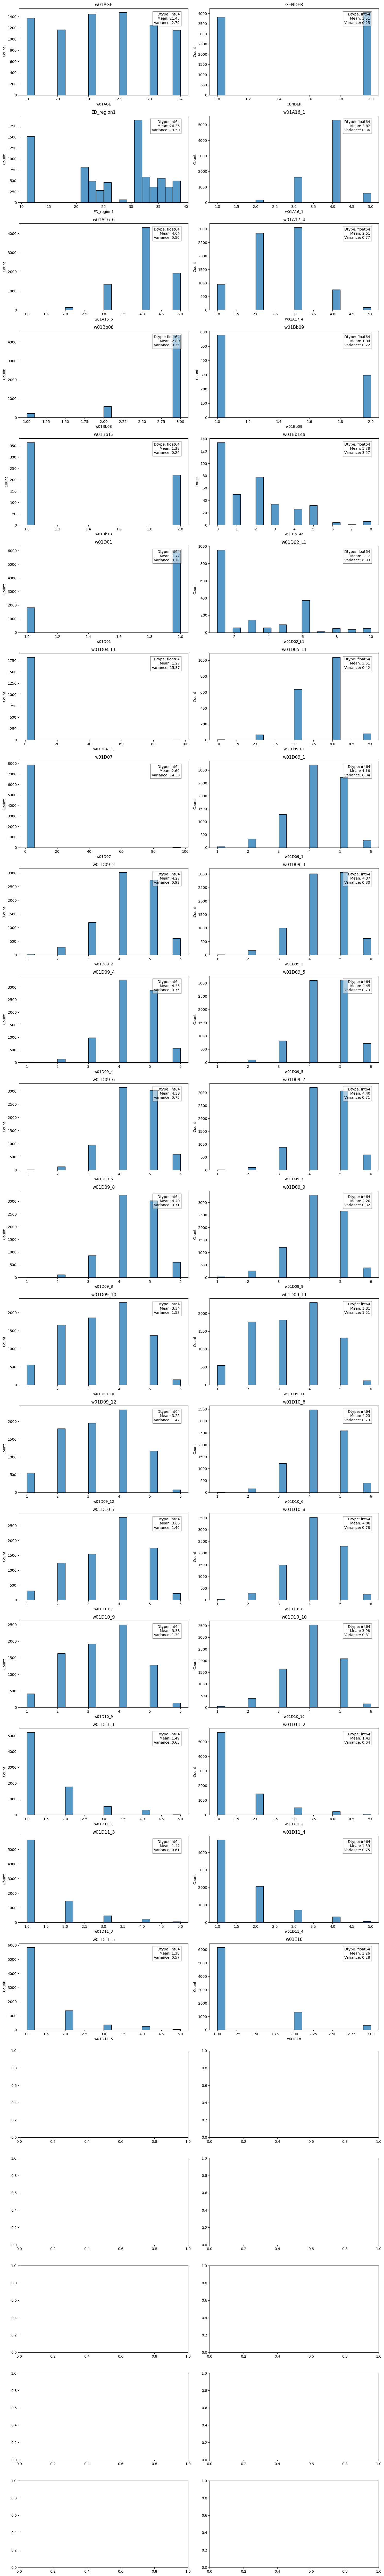

In [ ]:
fig, axes = plt.subplots(24, 2, figsize=(15, 100))

for i, col in enumerate(df.columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(df[col], bins=20, kde=False, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    dtype = df[col].dtype

    if dtype == 'object':
        most_common = df[col].mode()[0]
        textstr = f'Dtype: {dtype}\nMode: {most_common}'
    else:
        mean_val = df[col].mean()
        var_val = df[col].var()
        textstr = f'Dtype: {dtype}\nMean: {mean_val:.2f}\nVariance: {var_val:.2f}'

    # 통계 값 텍스트로 표시
    axes[row, col_idx].text(0.95, 0.95, textstr, transform=axes[row, col_idx].transAxes,
                            fontsize=10, verticalalignment='top', horizontalalignment='right',
                            bbox=dict(facecolor='white', alpha=0.5))

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

- w01A16_1: 최빈값 대체
- w01A16_6 : 최빈값 대체
- w01A17_4 : 중앙값 대체
- w01Bb08 : 최빈값 대체
- w01Bb09 : 최빈값 대체

In [ ]:
# w01A16_1 변수의 최빈값 계산
mode_value_w01A16_1 = df['w01A16_1'].mode()[0]

# 최빈값으로 결측치 대체
df['w01A16_1'] = df['w01A16_1'].fillna(mode_value_w01A16_1)

In [ ]:
# w01A16_6 변수의 최빈값 계산
mode_value_w01A16_6 = df['w01A16_6'].mode()[0]

# 최빈값으로 결측치 대체
df['w01A16_6'] = df['w01A16_6'].fillna(mode_value_w01A16_6)

In [ ]:
# w01A17_4 변수의 중앙값 계산
median_value_w01A17_4 = df['w01A17_4'].median()

# 중앙값으로 결측치 대체
df['w01A17_4'] = df['w01A17_4'].fillna(median_value_w01A17_4)

In [ ]:
# w01Bb08 변수의 최빈값 계산
mode_value_w01Bb08 = df['w01Bb08'].mode()[0]

# 최빈값으로 결측치 대체
df['w01Bb08'] = df['w01Bb08'].fillna(mode_value_w01Bb08)

In [ ]:
# w01Bb09 변수의 최빈값 계산
mode_value_w01Bb09 = df['w01Bb09'].mode()[0]

# 최빈값으로 결측치 대체
df['w01Bb09'] = df['w01Bb09'].fillna(mode_value_w01Bb09)

In [ ]:
# w01Bb13 변수의 최빈값 계산
mode_value_w01Bb13 = df['w01Bb13'].mode()[0]

# 최빈값으로 결측치 대체
df['w01Bb13'] = df['w01Bb13'].fillna(mode_value_w01Bb13)

- ED_region1: 이진 인코딩(서울인지 아닌지)
- w01A16_1, w01A16_6, w01A17_4 : 순서형 변수(순서형 인코딩) -> 이미 1,...,5로 되어 있어 사실상 순서형 인코딩이 된 것
- w01Bb08, w01E18 : 명목형 - 원핫 인코딩
- GENDER, w01Bb09, w01Bb13, w01D01 : 이진 인코딩
- w01Bb14a, w01D02_L1, w01D04_L1, w01D05_L1, w01D07, w01E18 : 예측모델에서 삭제

> 성별 인코딩(이진 인코딩)

In [ ]:
# gender 변환 (남성=1, 여성=0)
df['GENDER'] = df['GENDER'].replace({1: 1, 2: 0})

> 지역 인코딩(이진 인코딩)

In [ ]:
# ED_region1 값이 11(서울)인 경우 1, 아닌 경우 0으로 변환
df['ED_region1_Seoul'] = (df['ED_region1'] == 11).astype(int)

# ED_region1 삭제
df.drop(columns=['ED_region1'], inplace=True)

> w01A17_4 성적 반전(5(하위권) -> 1,..., 1(상위권) -> 5)

In [ ]:
df['w01A17_4'] = 6 - df['w01A17_4']

> w01Bb08(최종학교 졸업 후 구직활동 여부) 원-핫 인코딩
- job_activity_1.0 : 구직활동이 있었음 (1이면 있었음, 0이면 없었음)
- job_activity_2.0 : 구직활동이 없었음 (1이면 없었음, 0이면 있었음)
- job_activity_3.0 : 현재 정규교육기관 재학 중 (1이면 재학 중, 0이면 아님)

In [ ]:
df = pd.get_dummies(df, columns=['w01Bb08'], prefix='job_activity')

> w01Bb09, w01Bb13, w01D01 이진 인코딩

In [ ]:
# w01Bb09 변환 (근로 의향 있다=1, 없다=0)
df['w01Bb09'] = df['w01Bb09'].replace({1: 1, 2: 0})

In [ ]:
# w01Bb13 변환 (장래희망 직업 유무 있다=1, 없다=0)
df['w01Bb13'] = df['w01Bb13'].replace({1: 1, 2: 0})

In [ ]:
# w01D01 변환 (진로지도 경험 여부 있다=1, 없다=0)
df['w01D01'] = df['w01D01'].replace({1: 1, 2: 0})

- w01A16_1: 고교 생활 전반적 만족도
- w01A16_6 : 고교 생활 교우관계
- w01A17_4 : 고교 평균 성적
- w01Bb08 : 최종학교 졸업 후 구직활동 여부
- w01Bb09 : 향후 근로 의향
- w01Bb13 : 장래 희망직업 유무
- w01Bb14a : 희망직업(직업분야)
- w01D02_L1 : 진로지도 종류  
- w01D04_L1 : 진로지도 기관  
- w01D05_L1 : 진로지도 도움 정도
- w01D07 : 희망 최종 학력  
- w01E18 : 부모님과 동거 여부



진로 동기(w01D10_6~w01D10_10)

In [ ]:
# 역코딩 처리
reverse_items_motivation = ['w01D10_7', 'w01D10_9']
for item in reverse_items_motivation:
    df[item] = 7 - df[item]

# 진로 동기를 계산하기 위한 문항 리스트
motivation_items = ['w01D10_6', 'w01D10_7', 'w01D10_8', 'w01D10_9', 'w01D10_10']

# 각 행 진로 동기 평균 계산 (결측치는 자동으로 제외됨)
df['careerMotivation'] = df[motivation_items].mean(axis=1)
print(df[['careerMotivation']].head())

   careerMotivation
0               3.8
1               4.0
2               4.2
4               3.6
6               4.0


스트레스 정도(w01D11_1~w01D11_5)

In [ ]:
# 스트레스 정도를 계산하기 위한 문항 리스트
stress_items = ['w01D11_1', 'w01D11_2', 'w01D11_3', 'w01D11_4', 'w01D11_5']

# 각 행 스트레스 정도 평균 계산 (결측치는 자동으로 제외됨)
df['career_stress'] = df[stress_items].mean(axis=1)
print(df[['career_stress']].head())

   career_stress
0            1.2
1            1.4
2            1.4
4            1.4
6            1.0


진로성숙도(y target 값) (w01D09_1~w01D09_12)

In [ ]:
# 역코딩 처리
reverse_items = ['w01D09_10', 'w01D09_11', 'w01D09_12']
for item in reverse_items:
    df[item] = 7 - df[item]

# 진로성숙도 계산하기 위한 문항 리스트
items = ['w01D09_1', 'w01D09_2', 'w01D09_3', 'w01D09_4', 'w01D09_5', 'w01D09_6',
         'w01D09_7', 'w01D09_8', 'w01D09_9', 'w01D09_10', 'w01D09_11', 'w01D09_12']

# 각 행 진로성숙도 평균 계산 (결측치는 자동으로 제외됨)
df['TARGET'] = df[items].mean(axis=1)
print(df[['TARGET']].head())

     TARGET
0  5.083333
1  4.666667
2  3.166667
4  4.666667
6  4.750000


In [ ]:
# careerMotivation, careerstress, TARGET 변수를 만드는 데 이용한 칼럼 제거
# w01D09_1, w01D09_2, w01D09_3, w01D09_4, w01D09_5, w01D09_6,w01D09_7,w01D09_8,w01D09_9,w01D09_10, w01D09_11, w01D09_12
# w01D10_6,w01D10_7, w01D10_8, w01D10_9, w01D10_10
# w01D11_1, w01D11_2, w01D11_3, w01D11_4, w01D11_5

# w01D02_L1, w01D04_L1, w01D05_L1, w01Bb14a : 인코딩하면 변수 종류가 너무 많아져 모델에서 삭제
# w01D07, w01E18 : 진로성숙도와 큰 관련이 없어보여 삭제

columns=['w01D09_1', 'w01D09_2', 'w01D09_3', 'w01D09_4', 'w01D09_5', 'w01D09_6', 'w01D09_7' ,'w01D09_8' ,'w01D09_9' ,'w01D09_10', 'w01D09_11', 'w01D09_12',
         'w01D10_6', 'w01D10_7', 'w01D10_8', 'w01D10_9', 'w01D10_10',
         'w01D11_1', 'w01D11_2', 'w01D11_3', 'w01D11_4', 'w01D11_5',
         'w01D02_L1', 'w01D04_L1', 'w01D05_L1', 'w01Bb14a', 'w01D07','w01E18',
         'job_activity_2.0', 'job_activity_3.0']
df=df.drop(labels=columns,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 12212
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   w01AGE            7871 non-null   int64  
 1   GENDER            7871 non-null   int64  
 2   w01A16_1          7871 non-null   float64
 3   w01A16_6          7871 non-null   float64
 4   w01A17_4          7871 non-null   float64
 5   w01Bb09           7871 non-null   float64
 6   w01Bb13           7871 non-null   float64
 7   w01D01            7871 non-null   int64  
 8   ED_region1_Seoul  7871 non-null   int64  
 9   job_activity_1.0  7871 non-null   bool   
 10  careerMotivation  7871 non-null   float64
 11  career_stress     7871 non-null   float64
 12  TARGET            7871 non-null   float64
dtypes: bool(1), float64(8), int64(4)
memory usage: 807.1 KB


In [ ]:
# 결측치 확인
# 각 컬럼의 결측치 개수 계산
missing_values =df.isnull().sum()

# 결과 출력
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
print(missing_values_df)

              Column  Missing Values
0             w01AGE               0
1             GENDER               0
2           w01A16_1               0
3           w01A16_6               0
4           w01A17_4               0
5            w01Bb09               0
6            w01Bb13               0
7             w01D01               0
8   ED_region1_Seoul               0
9   job_activity_1.0               0
10  careerMotivation               0
11     career_stress               0
12            TARGET               0


TRUE, FALSE -> 1, 0 으로 변경

In [ ]:
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool']).columns})

> 추가 정보(히스토그램 정도)
- 보여주려면 결측치 대체한 데이터가 아닌 결측치 제거한 데이터로 보여줘야 할 듯
- w01D02_L1 : 진로지도 종류
- w01D04_L1 : 진로지도 기관
- w01D05_L1 : 진로지도 도움 정도
진로지도가 유의한 변수
- w01Bb14a : 희망직업(직업분야)
- w01D07 : 희망 최종 학력

In [ ]:
df.TARGET.describe()

,TARGET
count,7871.000000
mean,4.171854
std,0.573050
min,1.083333
25%,3.833333
50%,4.083333
75%,4.500000
max,6.000000


In [ ]:
# 칼럼 이름 변경
df = df.rename(columns={
    'w01AGE': 'Age',
    'w01A16_1': 'HighSchool_Satisfaction_Overall',
    'w01A16_6': 'HighSchool_Satisfaction_PeerRelations',
    'w01A17_4': 'HighSchool_AverageScore',
    "w01Bb09": "Future_Work_Intention",
    "w01Bb13": "Career_Aspiration",
    'w01D01': 'CareerGuidance_Experience',
    'ED_region1_Seoul': 'Region',
    "job_activity_1.0": "Job_Search_Active"
})


# 변경된 데이터프레임 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 12212
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    7871 non-null   int64  
 1   GENDER                                 7871 non-null   int64  
 2   HighSchool_Satisfaction_Overall        7871 non-null   float64
 3   HighSchool_Satisfaction_PeerRelations  7871 non-null   float64
 4   HighSchool_AverageScore                7871 non-null   float64
 5   Future_Work_Intention                  7871 non-null   float64
 6   Career_Aspiration                      7871 non-null   float64
 7   CareerGuidance_Experience              7871 non-null   int64  
 8   Region                                 7871 non-null   int64  
 9   Job_Search_Active                      7871 non-null   int64  
 10  careerMotivation                       7871 non-null   float64
 11  career_s

상관계수 히트맵

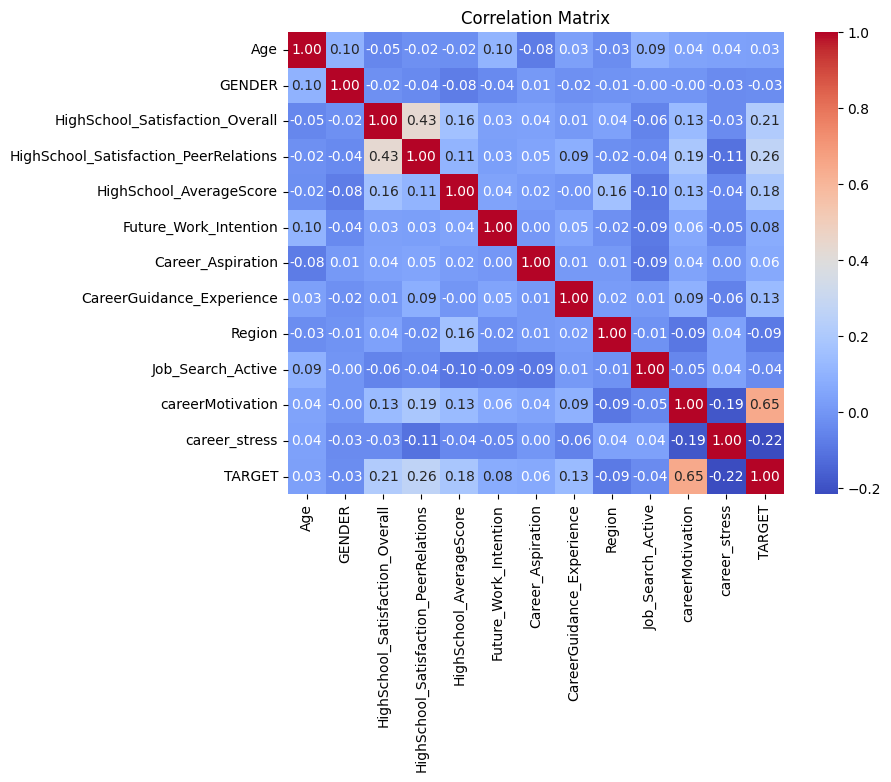

In [ ]:
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

VIF(이건 보고서에서 빼야함)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 생성
X = df.drop(columns=['TARGET'])  # 독립 변수들로 구성된 데이터프레임
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif_data)

                                  Feature        VIF
0                                     Age  85.355529
1                                  GENDER   1.986474
2         HighSchool_Satisfaction_Overall  50.244746
3   HighSchool_Satisfaction_PeerRelations  42.440072
4                 HighSchool_AverageScore  18.043493
5                   Future_Work_Intention  26.478859
6                       Career_Aspiration  31.619085
7               CareerGuidance_Experience   1.327398
8                                  Region   1.294063
9                       Job_Search_Active   1.067489
10                       careerMotivation  46.829783
11                          career_stress   5.329453


이것도 100 이상이면 다중공선성 있다고 판단하므로 보고서에서 제외

In [ ]:
import numpy as np

# 조건수 계산
condition_number = np.linalg.cond(X)
print(f"Condition Number: {condition_number}")

Condition Number: 142.24634602811014


## 여기부터 회귀분석
> 의사결정 나무 + 모델 변수 중요도 분석 등 작업 필요함 / train, test 부분 수정 필요함

> SHAP을 이용한 회귀분석

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import shap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

Age = 0.00527
GENDER = -0.01866
HighSchool_Satisfaction_Overall = 0.08517
HighSchool_Satisfaction_PeerRelations = 0.06723
HighSchool_AverageScore = 0.05803
Future_Work_Intention = 0.07751
Career_Aspiration = 0.13368
CareerGuidance_Experience = 0.09383
Region = -0.06583
Job_Search_Active = 0.04057
careerMotivation = 0.5649
career_stress = -0.07833


In [ ]:
explainer = shap.LinearExplainer(model, X_train) # 학습 데이터로 explainer 생성
shap_values = explainer.shap_values(X_test) # 학습 데이터로 explainer 생성

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측값 계산
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MSE: 0.16862324189070374
RMSE: 0.4106376040874773
R²: 0.4796612383748091


> 각 기능에 대한 shap 값의 평균 절댓값 취한 표준 막대 그래프

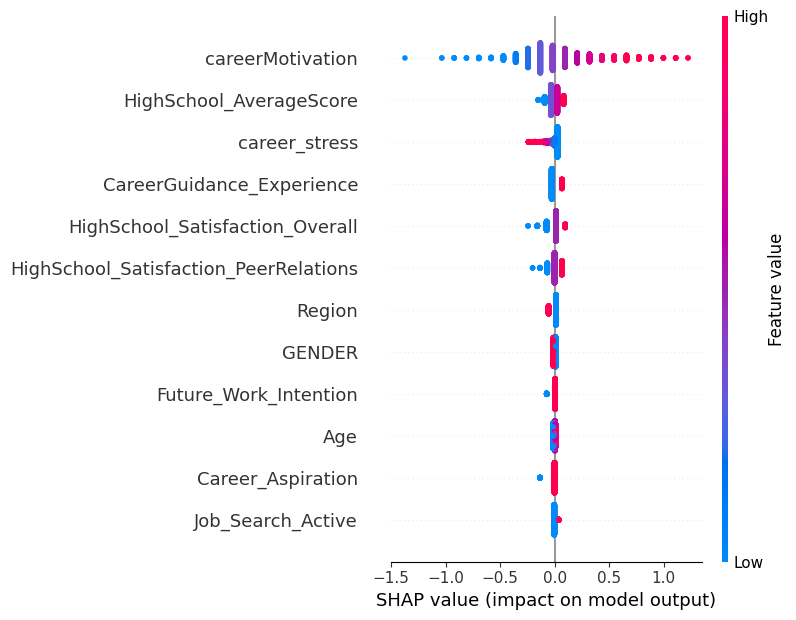

In [ ]:
shap.summary_plot(shap_values, X_test) # SHAP 값 시각화 (Summary Plot)

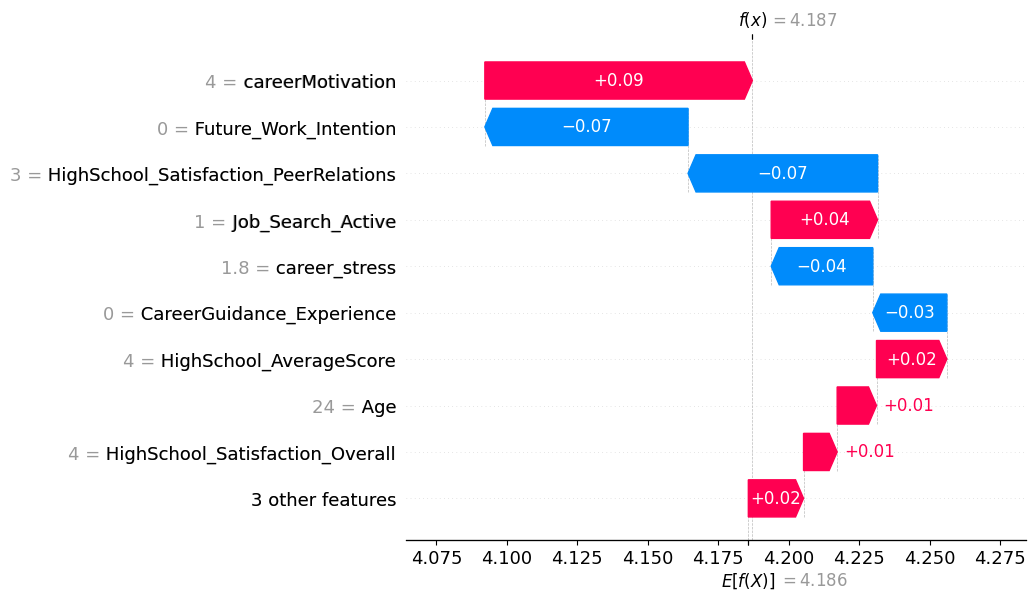

In [ ]:
instance_to_plot = X_test.iloc[7]  # 첫 번째 인스턴스 선택
shap.waterfall_plot(shap.Explanation(values=shap_values[7],
                                      base_values=explainer.expected_value,
                                      data=instance_to_plot))

- x축: 예측 모델에서 종속변수 값(진로성숙도)
- E[f(X)]=4.181은 이 모델에서 Y(종속변수)의 평균
- y축: 독립변수 모든 독립변수의 shap value:

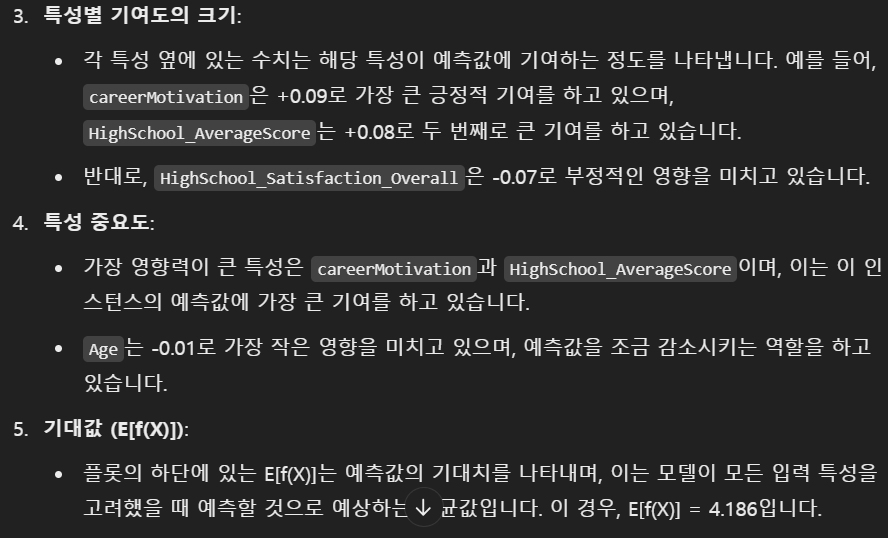

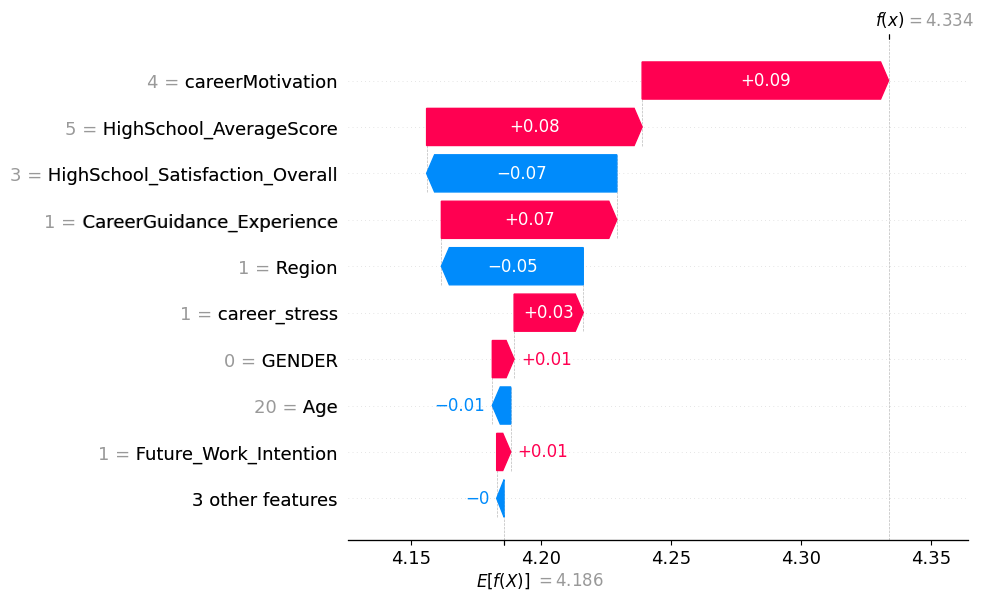

가장 성능이 좋은 인스턴스의 인덱스: 767
가장 성능이 좋은 인스턴스의 실제값: 4.333333333333333
모델의 예측값: 4.333748366695182


In [ ]:
# 예측값 계산
y_pred = model.predict(X_test)

# 예측값과 실제값의 차이 계산 (오차)
errors = np.abs(y_pred - y_test)

# 가장 성능이 좋은 인스턴스 (오차가 최소인 인스턴스 찾기)
best_index = np.argmin(errors)  # 가장 작은 오차 인덱스
best_instance = X_test.iloc[best_index]  # 가장 성능이 좋은 인스턴스

# SHAP 값 계산
explainer = shap.LinearExplainer(model, X_train)  # LinearExplainer 사용
shap_values = explainer.shap_values(X_test)  # SHAP 값 계산

# Waterfall Plot 시각화
shap.waterfall_plot(shap.Explanation(values=shap_values[best_index],
                                      base_values=explainer.expected_value,
                                      data=best_instance))

plt.show()

# 결과 출력
print("가장 성능이 좋은 인스턴스의 인덱스:", best_index)
print("가장 성능이 좋은 인스턴스의 실제값:", y_test.iloc[best_index])
print("모델의 예측값:", y_pred[best_index])

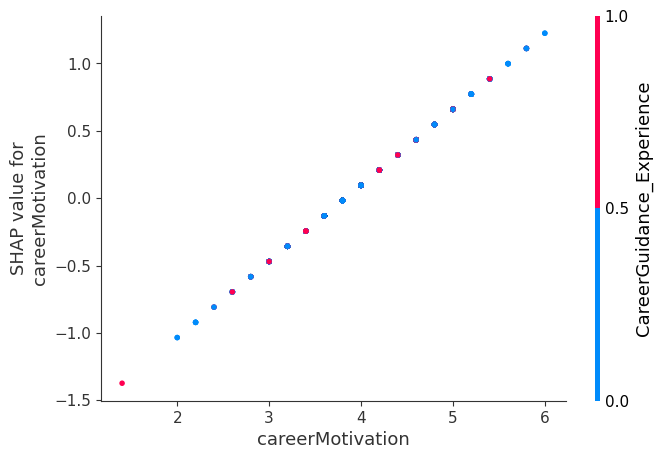

In [ ]:
# 특정 특성에 대한 의존성 플롯
feature_to_plot = 'careerMotivation'  # careerMotivation 특성을 선택
shap.dependence_plot(feature_to_plot, shap_values, X_test)

# 플롯 표시
plt.show()

## Decision Tree (Using Tree SHAP)

In [ ]:
# 평균 기준으로 y_binary 생성
threshold = df['TARGET'].mean()
y_binary = (df['TARGET'] >= threshold).astype(int)

df['TARGET'] = y_binary
print(df[['TARGET']].head())
df['TARGET'].value_counts()

   TARGET
0       1
1       1
2       0
4       1
6       1


,count
TARGET,
0,4459
1,3412


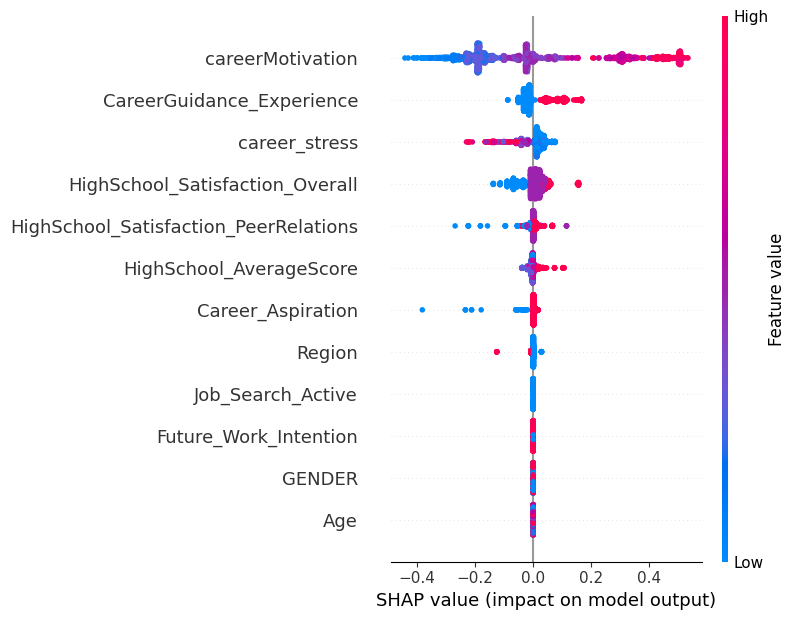

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import shap
import matplotlib.pyplot as plt

# 타겟 변수와 독립 변수 나누기
X = df.drop(columns=['TARGET'])  # 독립 변수
y = df['TARGET']                 # 종속 변수

# 데이터 분할 (훈련/테스트 데이터셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 학습
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test)
plt.show()

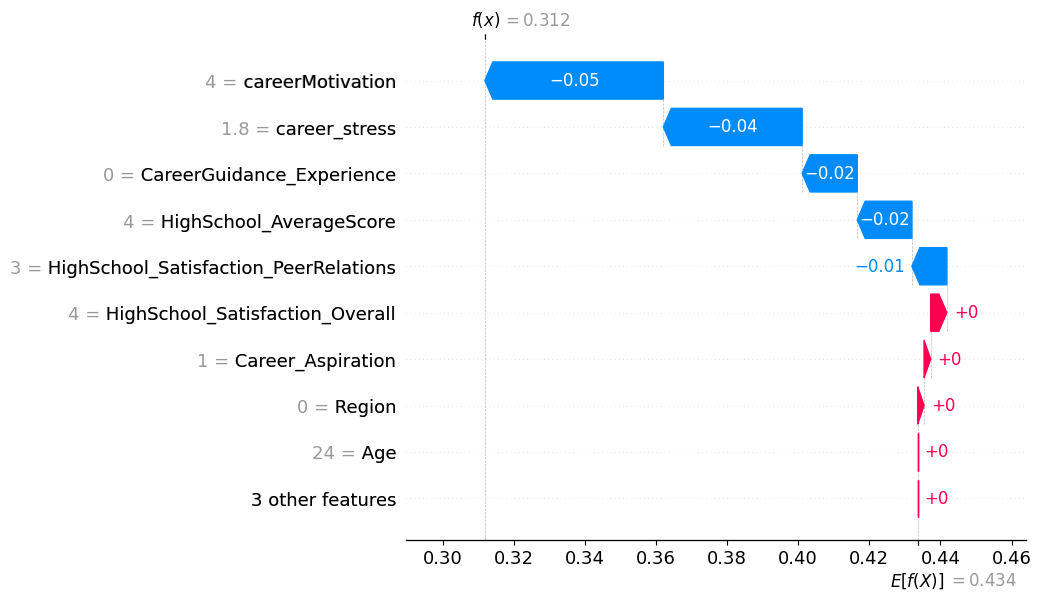

In [ ]:
instance_to_plot = X_test.iloc[7]  # 첫 번째 인스턴스 선택
shap.waterfall_plot(shap.Explanation(values=shap_values[7],
                                      base_values=explainer.expected_value,
                                      data=instance_to_plot))

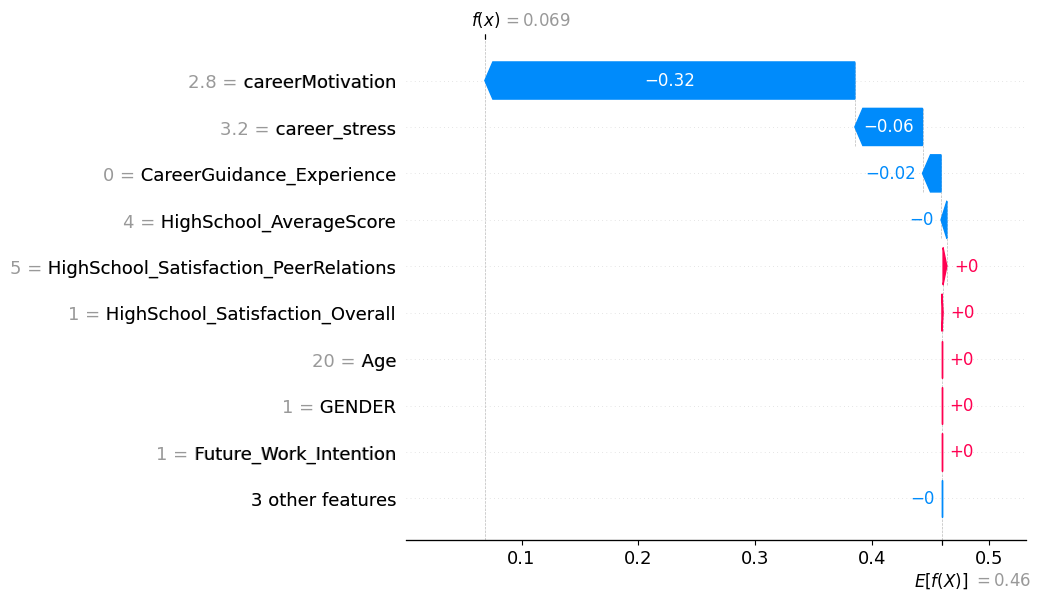

가장 성능이 좋은 인스턴스의 인덱스: 1247
가장 성능이 좋은 인스턴스의 실제값: 1
모델의 예측값: 3.275737864235566


In [ ]:
# 예측값 계산
y_pred = model.predict(X_test)

# 예측값과 실제값의 차이 계산 (오차)
errors = np.abs(y_pred - y_test)

# 가장 성능이 좋은 인스턴스 (오차가 최소인 인스턴스 찾기)
best_index = np.argmin(errors)  # 가장 작은 오차 인덱스
best_instance = X_test.iloc[best_index]  # 가장 성능이 좋은 인스턴스

# SHAP 값 계산
explainer = shap.TreeExplainer(dt_model, X_train)  # TreeExplainer 사용
shap_values = explainer.shap_values(X_test)  # SHAP 값 계산

# Waterfall Plot 시각화
shap.waterfall_plot(shap.Explanation(values=shap_values[best_index],
                                      base_values=explainer.expected_value,
                                      data=best_instance))

plt.show()

# 결과 출력
print("가장 성능이 좋은 인스턴스의 인덱스:", best_index)
print("가장 성능이 좋은 인스턴스의 실제값:", y_test.iloc[best_index])
print("모델의 예측값:", y_pred[best_index])

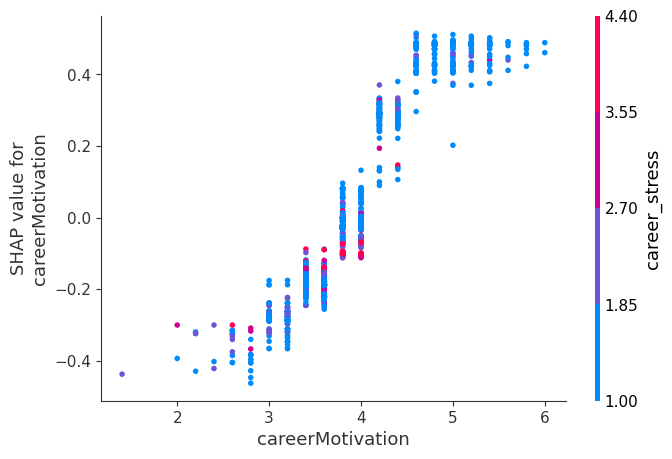

In [ ]:
# 특정 특성에 대한 의존성 플롯
feature_to_plot = 'careerMotivation'  # careerMotivation 특성을 선택
shap.dependence_plot(feature_to_plot, shap_values, X_test)

# 플롯 표시
plt.show()

## Random Forest (Using Tree SHAP)

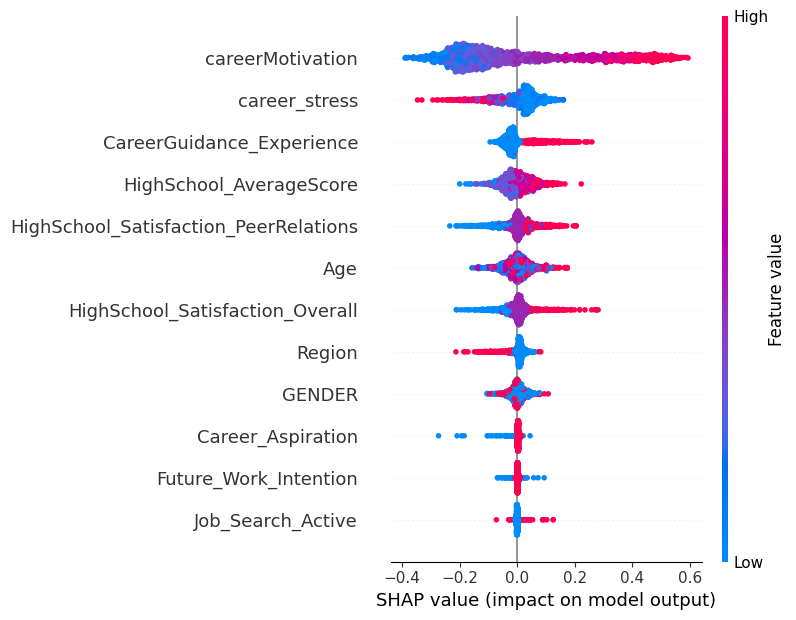

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# 타겟 변수와 독립 변수 나누기
X = df.drop(columns=['TARGET'])  # 독립 변수
y = df['TARGET']                 # 종속 변수

# 데이터 분할 (훈련/테스트 데이터셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# SHAP 값 시각화
shap.summary_plot(shap_values, X_test)
plt.show()

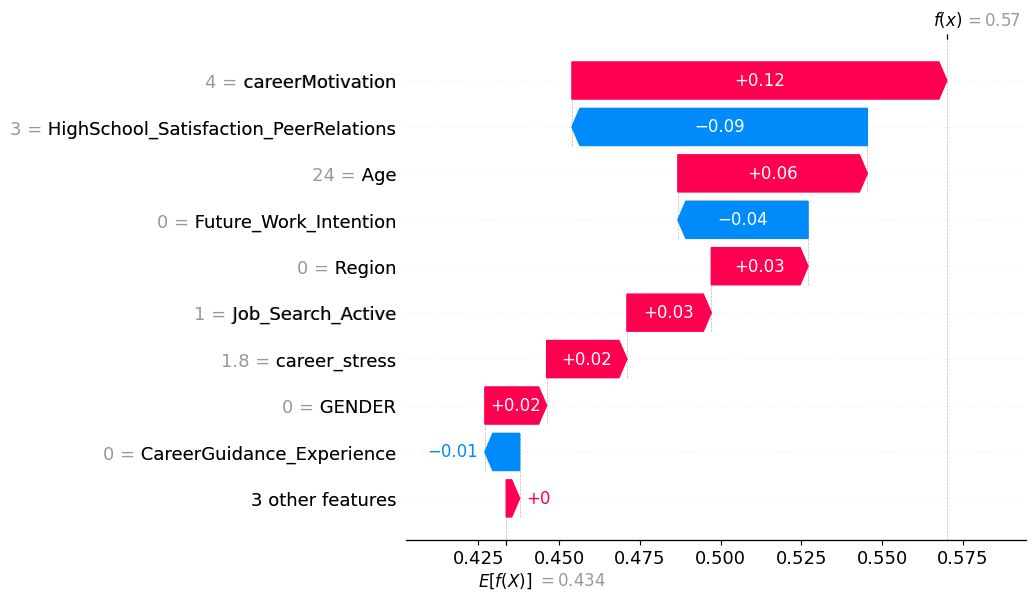

In [ ]:
instance_to_plot = X_test.iloc[7]  # 첫 번째 인스턴스 선택
shap.waterfall_plot(shap.Explanation(values=shap_values[7],
                                      base_values=explainer.expected_value,
                                      data=instance_to_plot))

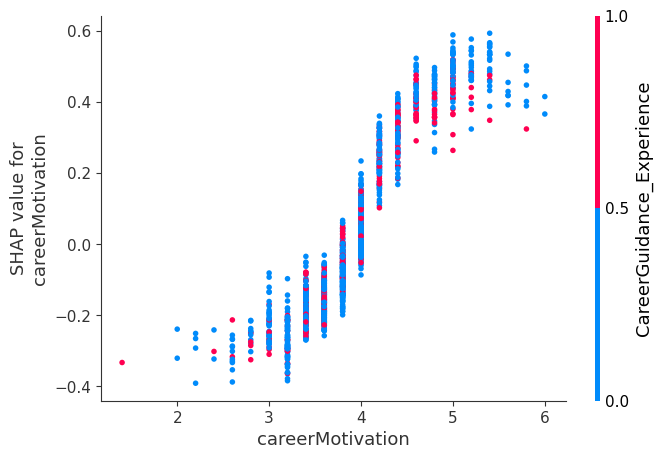

In [ ]:
# 특정 특성에 대한 의존성 플롯
feature_to_plot = 'careerMotivation'  # careerMotivation 특성을 선택
shap.dependence_plot(feature_to_plot, shap_values, X_test)

# 플롯 표시
plt.show()

특정 특성은 다른 특성들도 선택해서 설명하면 좋을 듯